<a href="https://colab.research.google.com/github/renasyan/datmin-tubes-mlbb/blob/main/TUBES_DATMIN_MOBILE_LEGEND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Read Data**

disini kita melakukan Read data agar data dapat terbaca.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('results.csv')
df.head()

Saving results.csv to results (4).csv


,Unnamed: 0,file,player,ss_type,opening_failure,battle_id,match_result,match_duration,left_team_kills,right_team_kills,left_heroes,right_heroes,left_medals,right_medals,left_scores,right_scores
0,0,-Lexi/Screenshot_20230312-123242.jpg,-Lexi,Result,False,826832277614711985,Victory,27.583333,52,44,"['Melissa', 'Valir', 'Esmeralda', 'Lancelot', ...","['Franco', 'Chou', 'Cecilion', 'Aamon', 'Moskov']","['Silver', 'Gold', 'Silver', 'MVP Win', 'Gold']","['Silver', 'Bronze', 'Silver', 'MVP Lose', 'Go...","[6.7, 10.9, 7.4, 11.8, 10.0]","[8.3, 3.7, 8.6, 8.7, 8.6]"
1,1,-Lexi/Screenshot_20230312-123251.jpg,-Lexi,Result,False,826568042636726171,Defeat,15.383333,23,22,"['Xavier', 'Moskov', 'Helcurt', 'Masha', 'Esme...","['Carmilla', 'Lolita', 'Cecilion', 'Wanwan', '...","['Gold', 'Bronze', 'MVP Lose', 'Silver', 'Silv...","['Silver', 'Gold', 'MVP Win', 'Gold', 'Silver']","[7.6, 5.4, 9.6, 6.7, 6.9]","[5.8, 8.2, 8.9, 6.5, 5.6]"
2,2,-Lexi/Screenshot_20230312-123300.jpg,-Lexi,Result,False,190736668910472369,Defeat,16.883333,33,26,"['Balmond', 'Kadita', 'Esmeralda', 'Clint', 'E...","['Fredrinn', 'Lesley', 'Silvanna', 'Hylos', 'V...","['Silver', 'MVP Lose', 'Gold', 'Silver', 'Bron...","['MVP Win', 'Silver', 'Silver', 'Gold', 'Gold']","[7.9, 8.9, 8.3, 6.3, 5.4]","[9.2, 7.2, 5.7, 7.9, 7.8]"
3,3,-Lexi/Screenshot_20230312-123309.jpg,-Lexi,Result,False,822791349044299775,Victory,13.300000,33,16,"['Clint', 'Lunox', 'Esmeralda', 'Akai', 'Balmo...","['Yin', 'Dyrroth', 'Chou', 'Harith', 'Wanwan']","['MVP Win', 'Silver', 'Gold', 'Silver', 'Gold']","['MVP Lose', 'Silver', 'Silver', 'Silver', 'Br...","[10.2, 6.3, 8.7, 7.1, 8.9]","[6.7, 5.9, 5.3, 5.4, 3.0]"
4,4,-Lexi/Screenshot_20230312-123318.jpg,-Lexi,Result,False,190515572584006250,Defeat,15.066667,27,28,"['Esmeralda', 'Lunox', 'Wanwan', 'Kadita', 'Fa...","['Kimmy', 'Badang', 'Natalia', 'Angela', 'Roger']","['MVP Lose', 'Silver', 'Bronze', 'Silver', 'Br...","['Gold', 'Bronze', 'Gold', 'Bronze', 'MVP Win']","[10.7, 5.8, 3.6, 5.2, 4.0]","[8.0, 3.3, 7.7, 4.1, 9.3]"


In [ ]:
df.describe()

,match_duration,left_team_kills,right_team_kills
count,5224.000000,5224.000000,5224.000000
mean,14.731780,25.763208,20.467841
std,4.010759,8.668508,10.361202
min,3.166667,0.000000,0.000000
25%,11.750000,21.000000,12.000000
50%,14.116667,26.000000,20.000000
75%,16.950000,31.000000,28.000000
max,34.466667,60.000000,62.000000


# **DATA CLEANSING**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224 entries, 0 to 5223
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5224 non-null   int64  
 1   file              5224 non-null   object 
 2   player            5224 non-null   object 
 3   ss_type           5224 non-null   object 
 4   opening_failure   5224 non-null   bool   
 5   battle_id         5224 non-null   int64  
 6   match_result      5224 non-null   object 
 7   match_duration    5224 non-null   float64
 8   left_team_kills   5224 non-null   int64  
 9   right_team_kills  5224 non-null   int64  
 10  left_heroes       5224 non-null   object 
 11  right_heroes      5224 non-null   object 
 12  left_medals       5224 non-null   object 
 13  right_medals      5224 non-null   object 
 14  left_scores       5224 non-null   object 
 15  right_scores      5224 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(1

In [ ]:
df=df.drop(columns=["Unnamed: 0","file", "player", "ss_type", "opening_failure", "battle_id", "right_medals", "left_medals" ], axis=1)
df

,match_result,match_duration,left_team_kills,right_team_kills,left_heroes,right_heroes,left_scores,right_scores
0,Victory,27.583333,52,44,"['Melissa', 'Valir', 'Esmeralda', 'Lancelot', ...","['Franco', 'Chou', 'Cecilion', 'Aamon', 'Moskov']","[6.7, 10.9, 7.4, 11.8, 10.0]","[8.3, 3.7, 8.6, 8.7, 8.6]"
1,Defeat,15.383333,23,22,"['Xavier', 'Moskov', 'Helcurt', 'Masha', 'Esme...","['Carmilla', 'Lolita', 'Cecilion', 'Wanwan', '...","[7.6, 5.4, 9.6, 6.7, 6.9]","[5.8, 8.2, 8.9, 6.5, 5.6]"
2,Defeat,16.883333,33,26,"['Balmond', 'Kadita', 'Esmeralda', 'Clint', 'E...","['Fredrinn', 'Lesley', 'Silvanna', 'Hylos', 'V...","[7.9, 8.9, 8.3, 6.3, 5.4]","[9.2, 7.2, 5.7, 7.9, 7.8]"
3,Victory,13.300000,33,16,"['Clint', 'Lunox', 'Esmeralda', 'Akai', 'Balmo...","['Yin', 'Dyrroth', 'Chou', 'Harith', 'Wanwan']","[10.2, 6.3, 8.7, 7.1, 8.9]","[6.7, 5.9, 5.3, 5.4, 3.0]"
4,Defeat,15.066667,27,28,"['Esmeralda', 'Lunox', 'Wanwan', 'Kadita', 'Fa...","['Kimmy', 'Badang', 'Natalia', 'Angela', 'Roger']","[10.7, 5.8, 3.6, 5.2, 4.0]","[8.0, 3.3, 7.7, 4.1, 9.3]"
...,...,...,...,...,...,...,...,...
5219,Defeat,17.716667,26,45,"['Clint', 'Johnson', 'Vexana', 'Saber', 'Bened...","['Guinevere', 'Brody', 'Jawhead', 'Khufra', 'K...","[5.1, 7.1, 3.0, 6.1, 7.7]","[9.8, 7.1, 12.6, 8.0, 6.5]"
5220,Defeat,12.716667,15,31,"['Kagura', 'Martis', 'Melissa', 'Kaja', 'X.Borg']","['Johnson', 'Kadita', 'Aulus', 'Brody', 'Hilda']","[6.7, 6.4, 4.3, 3.8, 4.9]","[9.0, 6.9, 8.4, 11.7, 8.1]"
5221,Defeat,16.150000,25,27,"['Johnson', 'Brody', 'Odette', 'Thamuz', 'Gusi...","['Melissa', 'Dyrroth', 'Vexana', 'Aldous', 'Fr...","[9.8, 6.0, 7.5, 4.6, 6.5]","[6.8, 6.0, 7.8, 8.7, 7.1]"
5222,Victory,15.250000,30,31,"['Johnson', 'Odette', 'Martis', 'Sun', 'Miya']","['Jawhead', 'Terizla', 'Vexana', 'Hanzo', 'Nat...","[6.0, 6.3, 7.6, 8.1, 7.1]","[7.4, 4.0, 7.0, 8.0, 6.9]"


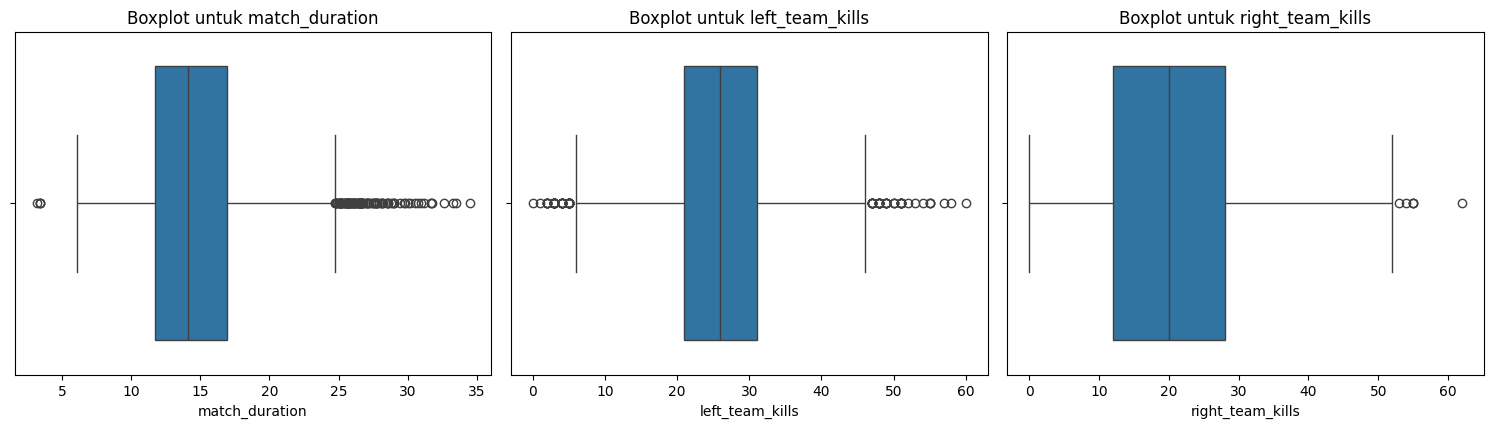

In [ ]:
def display_boxplot():
  numerical_cols = df.select_dtypes(include=['number'])
  plt.figure(figsize=(20, 20))

  for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot untuk {col}")

  plt.tight_layout()
  plt.show()

display_boxplot()

In [ ]:
numerical_cols = df.select_dtypes(include=['number'])

outlier_index = []
for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df.index[(df[column] < (Q1 - 1.5 * IQR))| (df[column] > (Q3 + 1.5 * IQR))]

    print(f"{column} : {len(outliers)}")
    outlier_index.extend(outliers)

outlier_index = sorted(set(outlier_index))
print(outlier_index)
df=df.drop(index=outlier_index)

match_duration : 119
left_team_kills : 107
right_team_kills : 6
[0, 36, 37, 67, 98, 129, 145, 147, 173, 216, 230, 264, 287, 323, 399, 412, 416, 423, 447, 472, 516, 533, 539, 543, 673, 692, 737, 746, 810, 827, 834, 836, 878, 954, 959, 1007, 1011, 1034, 1072, 1075, 1082, 1178, 1215, 1264, 1272, 1280, 1289, 1323, 1344, 1354, 1360, 1363, 1368, 1386, 1391, 1402, 1570, 1594, 1655, 1686, 1688, 1692, 1836, 1837, 1846, 1864, 1874, 1909, 1964, 1965, 2046, 2053, 2057, 2081, 2087, 2088, 2154, 2206, 2289, 2292, 2299, 2308, 2363, 2365, 2389, 2487, 2516, 2527, 2533, 2537, 2569, 2584, 2593, 2617, 2634, 2639, 2646, 2661, 2672, 2683, 2688, 2706, 2721, 2740, 2744, 2750, 2752, 2782, 2795, 2815, 2832, 2842, 2873, 2903, 2924, 2988, 2996, 2997, 3034, 3128, 3137, 3150, 3159, 3223, 3252, 3258, 3260, 3279, 3299, 3380, 3423, 3435, 3443, 3449, 3468, 3490, 3544, 3545, 3548, 3586, 3587, 3607, 3647, 3662, 3732, 3771, 3793, 3797, 3805, 3823, 3859, 3875, 3883, 3914, 3921, 3942, 3944, 3965, 3966, 4023, 4036, 4045, 4084

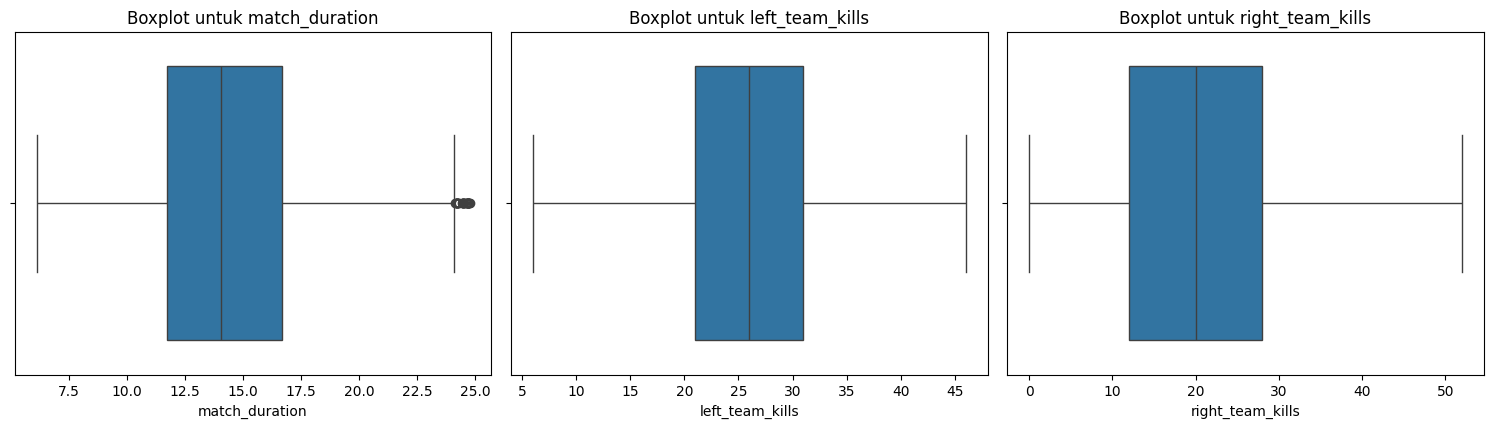

In [ ]:
display_boxplot()